# Preparing, Tidying, and Creating Informative Visualizations for Vehicle Manufacturing Data
This notebook aims to take a dataset about vehicle manufacturing production and create meaningful visualizations out of it.

##### We will learn:
- How to read in data
- Prepare and tidy the dataset before conducting visualizations 
- Learn different visualization tools, such as matplotlib and Bokeh
- Compare and contrast the similarities and differences between different Python visualization libraries

In [5]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### What dataset are we using, exactly?
The dataset we will be focusing on is a synthetic one, revolving around the manufacturing of different vehicles. 

The dataset offers a simulated representation of car information, covering diverse characteristics like car make, model, production year, color, mileage, cost, and location. Each entry corresponds to a distinct car, identified by its Car ID. Well-known car brands such as Toyota, Honda, Ford, Chevrolet, and Hyundai, along with their respective models, are featured within the dataset.

Additional columns capture essential particulars, encompassing the year of manufacture, color, mileage, price, and location for each car. These specifics provide insights into the array of available cars across various regions. The dataset contains a mixture of sedans, SUVs, and hatchbacks, showcasing a broad spectrum of choices for potential purchasers.

It's important to emphasize that this dataset is artificially generated for illustrative purposes exclusively. The values assigned to attributes like mileage, price, and location are fictional and do not correspond to real-world data. Nevertheless, this dataset can be employed for diverse analytical objectives, such as market exploration, trend assessment, and data modeling within the automotive sector.

This dataset could be useful if we wish to better understand the direction of where automobiles are headed. For example, we may see an increase in the production and  manufacturing of certain brands, such as Tesla, thus providing evidence of an electric future. We could also uncover which cities in the US are hotspots for vehicle production.

If you would like to access this dataset from the source, you can find it here: https://www.kaggle.com/datasets/arnavsmayan/vehicle-manufacturing-dataset

In [6]:
# Go into the data folder, and read in the csv dataset into the Python workspace. 
# Then, name that item "data".
data = pd.read_csv('../data/Car Data.csv')
data.head()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco


### Let's get a quick summary rundown of our EV data! This can be done using the ```.info()``` function. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car ID    2000 non-null   int64 
 1   Brand     2000 non-null   object
 2   Model     2000 non-null   object
 3   Year      2000 non-null   int64 
 4   Color     2000 non-null   object
 5   Mileage   2000 non-null   int64 
 6   Price     2000 non-null   int64 
 7   Location  2000 non-null   object
dtypes: int64(4), object(4)
memory usage: 125.1+ KB


### What does the above summary tell us about our EV dataset?
- It contains 8 columns and 2000 rows.
- There are 4 int64 columns, and 4 object columns.
- We don't have any missing values.

### Let's Gain Some Insight Into Our Data!

Let's analyze all the unique different brands, models, and locations in our dataset, using the ```value_counts()``` function.

In [8]:
brandData = data['Brand'].value_counts()
print(brandData)

Toyota       438
Honda        411
Ford         384
Chevrolet    384
Hyundai      383
Name: Brand, dtype: int64


As you can see, there are just 5 different brands in this dataset.

In [9]:
modelData = data['Model'].value_counts()
print(modelData)

Civic     109
Fusion     82
Camry      82
Cruze      55
Pilot      55
         ... 
Rav7        2
Rav6        2
Rav5        2
Rav4        2
Rav31       1
Name: Model, Length: 68, dtype: int64


It appears we have quite a big variety of different vehicle models from our 5 brands. Moreover, there seems to be something strange going on with the Rav SUV models from Toyota... We will deal with this later.

In [10]:
locationData = data['Location'].value_counts()
print(locationData)

Los Angeles      246
New York         219
Chicago          192
Miami            192
San Francisco    192
Dallas           192
Atlanta          192
Phoenix          192
Houston          192
Seattle          191
Name: Location, dtype: int64


In terms of cities that produce these vehicles, we have 10 unique cities. 

Now, let's create a pie chart to see which brand is producing the most number of vehicles.

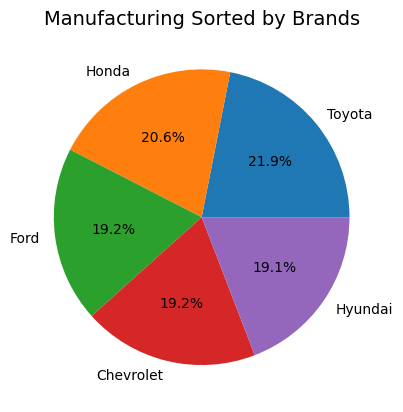

In [11]:
plt.pie(brandData.values , labels=brandData.index, autopct='%1.1f%%')
plt.title("Manufacturing Sorted by Brands", fontsize=14)
plt.show()

### Your Turn!

Now, let's do something similar, but this time for the location of where these vehicles are manufactured. This could give an idea about which cities the cars commonly come from.

Give it a shot!

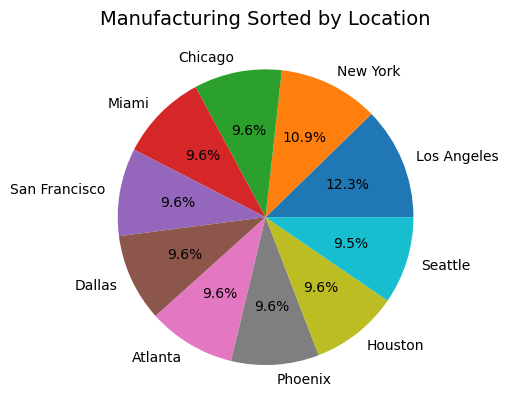

In [12]:
plt.pie(locationData.values , labels=locationData.index, autopct='%1.1f%%')
plt.title("Manufacturing Sorted by Location", fontsize=14)
plt.show()

So it appears that out of the 10 cities, LA has the highest percentage at 12.3% of production, while Seattle holds the lowest, at 9.5%. However, overall, all the cities produce an equal number of vehicles.

Let's use the ```to_string()``` function to obtain all the different vehicle models available to us in this dataset. 

In [13]:
print(modelData.to_string())

Civic         109
Fusion         82
Camry          82
Cruze          55
Pilot          55
Malibu         55
Fit            55
Sienna         55
Palisade       55
Tahoe          55
Edge           55
Odyssey        55
4Runner        55
Elantra        55
Traverse       55
Santa Fe       55
Mustang        55
Sonata         55
Corolla        55
Accord         55
Impala         55
Explorer       55
CR-V           55
Escape         55
Equinox        55
Venue          54
Yaris          54
Focus          28
Kona           28
Highlander     28
Tucson         27
Fiesta         27
Avalon         27
Genesis        27
Camaro         27
Accent         27
Prius          27
HR-V           27
Spark          27
EcoSport       27
Rav30           2
Rav29           2
Rav28           2
Rav27           2
Rav18           2
Rav25           2
Rav24           2
Rav23           2
Rav22           2
Rav21           2
Rav20           2
Rav19           2
Rav26           2
Rav16           2
Rav17           2
Rav15     

There seems to be a bunch of "Rav" models, most of which don't actually exist in real life. As far as I'm aware, the only Rav that makes sense is the Rav4, which is made by Toyota. 

To address this issue, we can take the sum of any and all "Rav" vehicles, and classify that as the Rav4. 

We can filter for this "Rav" value using regex (regular expressions). 

In [14]:
NumberOfRavs = modelData.filter(regex = 'Rav\d\d?').sum()
NumberOfRavs

55

As we can see, there are 55 total "Rav" SUVs. We will assign this value to the Rav4 later on. 

Let's convert our ```modelData``` series into a dataframe.

In [15]:
# Converting series into a dataframe

modelData = pd.DataFrame({'Model':modelData.index, 'Amount':modelData.values})

modelData


,Model,Amount
0,Civic,109
1,Fusion,82
2,Camry,82
3,Cruze,55
4,Pilot,55
...,...,...
63,Rav7,2
64,Rav6,2
65,Rav5,2
66,Rav4,2


Now that we have our raw dataset in the form of a dataframe, let's filter out any rows that contain the "Rav" term. We could've used regex here again, but I wanted to demonstrate another method that could be used.

In [16]:
# Filter out anything that contains "Rav"
modelData = modelData[~modelData['Model'].str.contains("Rav")]

modelData

,Model,Amount
0,Civic,109
1,Fusion,82
2,Camry,82
3,Cruze,55
4,Pilot,55
5,Malibu,55
6,Fit,55
7,Sienna,55
8,Palisade,55
9,Tahoe,55


Now, let's insert a new row, this time just called Rav4.

In [17]:
modelData.loc[len(modelData)] = ["Rav4", NumberOfRavs]

modelData

C:\Users\TESTUSER\AppData\Local\Temp\ipykernel_17916\3769489561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData.loc[len(modelData)] = ["Rav4", NumberOfRavs]


,Model,Amount
0,Civic,109
1,Fusion,82
2,Camry,82
3,Cruze,55
4,Pilot,55
5,Malibu,55
6,Fit,55
7,Sienna,55
8,Palisade,55
9,Tahoe,55


Great, now let's prepare for a visualization!

In [18]:
modelData = modelData.sort_values(by=['Amount'], ascending=False)

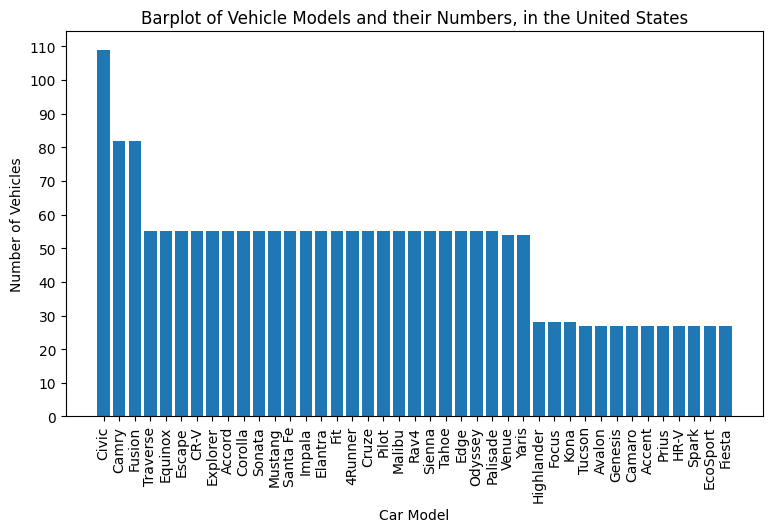

In [19]:
plt.figure(figsize=(9,5))

plt.bar(modelData['Model'], modelData['Amount'])

plt.xticks(rotation=90) # Rotate x-axis labels 90 degrees
plt.yticks(np.arange(0 , modelData["Amount"].max()+10 , 10))

plt.title("Barplot of Vehicle Models and their Numbers, in the United States") # Title the visualization 
plt.xlabel("Car Model")
plt.ylabel("Number of Vehicles")

plt.show()

As we can see from the bar chart above, the most popular car being produced is the Civic, with the Fusion and Camry tied at second place. 

Say I'm a big fan of the Chevrolet brand, and wanted to analyze the distribution of their vehicles. 

Let's see how I can go about doing this.

In [20]:
chevy = data[data['Brand']=='Chevrolet']['Model'].value_counts()
chevy

Cruze       55
Impala      55
Equinox     55
Traverse    55
Tahoe       55
Malibu      55
Spark       27
Camaro      27
Name: Model, dtype: int64

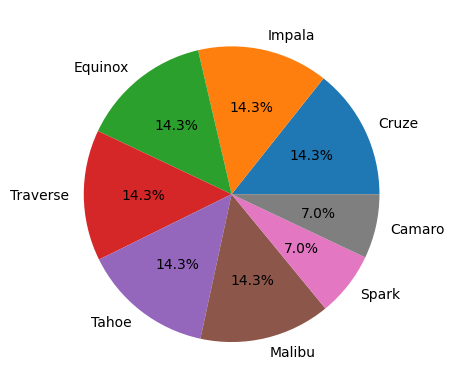

In [21]:
plt.pie(chevy.values, labels=chevy.index, autopct='%1.1f%%')
plt.show()

### Say I wanted to analyze the average cost of vehicles coming out of each city. How can I go about doing this?

In [22]:
data

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco
...,...,...,...,...,...,...,...,...
1995,1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1996,1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1997,1998,Honda,Fit,2018,Gray,50000,14000,Atlanta
1998,1999,Ford,Fusion,2017,White,55000,19000,Phoenix


In [23]:
locations = data[['Location', 'Price']].groupby(['Location']).mean()

locations.reset_index(inplace=True)

locations

,Location,Price
0,Atlanta,19432.291667
1,Chicago,19463.541667
2,Dallas,19755.208333
3,Houston,19500.000000
4,Los Angeles,19341.463415
5,Miami,19859.375000
6,New York,19812.785388
7,Phoenix,19671.875000
8,San Francisco,19541.666667
9,Seattle,19717.277487


In [24]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [25]:
cities = locations['Location']
price = locations['Price']
source = {'cities': cities, 'price': price}

In [26]:
visual = figure(title="Barplot of Cities and their Average Price", x_range=cities, y_range=(0,20000), 
                x_axis_label = "Cities", y_axis_label = "Price")

In [27]:
import math

visual.vbar(x='cities', top='price', width=0.7, legend_field='cities', source=source)
visual.xaxis.major_label_orientation = math.pi/2
visual.legend.visible=False

In [28]:
# Implementing Usage of Tooltips to Make Visualization More Informative
from bokeh.models.tools import HoverTool

visual.add_tools(HoverTool(tooltips=[("Cities", "@cities"), ("Price", "$@price{int}")]))

In [29]:
show(visual)